In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading data
data = pd.read_csv('Monthly-car-sales.csv', parse_dates=True, index_col=0, header=0, infer_datetime_format=True)
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


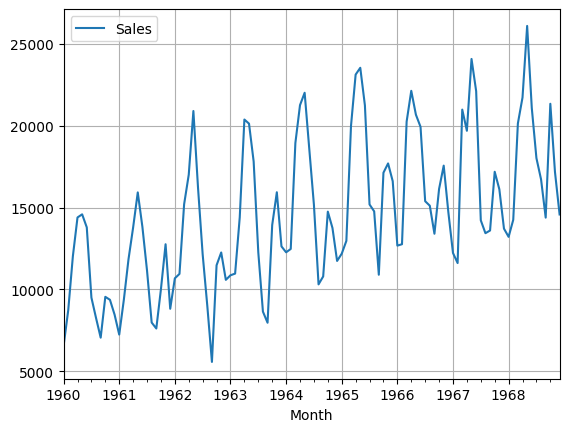

In [3]:
#A quick visualization
data.plot()
plt.grid()

In [4]:
#Decomposing the dataset to see its trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

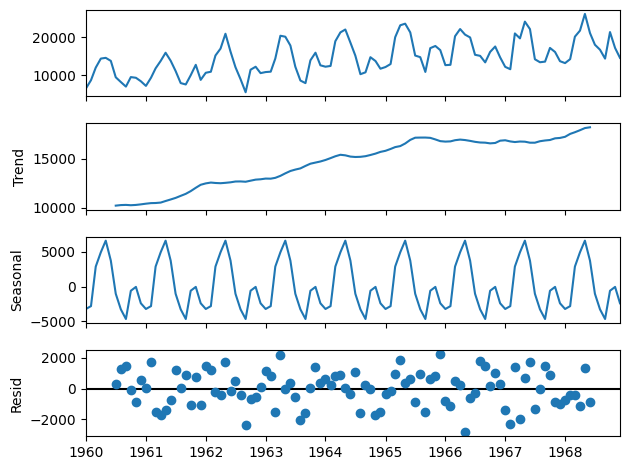

In [5]:
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

In [6]:
#train test split
train_index = int(len(data) * 0.8)
split_index = train_index

In [7]:
train_data = data[:split_index]
test_data = data[split_index:]

In [8]:
train_data

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1966-10-01,16135
1966-11-01,17562
1966-12-01,14720


In [9]:
#transforming the test_data into a series
test_data.squeeze()

Month
1967-03-01    20985
1967-04-01    19692
1967-05-01    24081
1967-06-01    22114
1967-07-01    14220
1967-08-01    13434
1967-09-01    13598
1967-10-01    17187
1967-11-01    16119
1967-12-01    13713
1968-01-01    13210
1968-02-01    14251
1968-03-01    20139
1968-04-01    21725
1968-05-01    26099
1968-06-01    21084
1968-07-01    18024
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, dtype: int64

In [10]:
#Beginning with the first of two models; Holt Winters Model

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
#fitting the holt winters model
warnings.filterwarnings('ignore')
hwmodel = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'multiplicative', seasonal_periods = 12).fit()

In [13]:
#predicting for the test_data
test_pred = hwmodel.forecast(22)

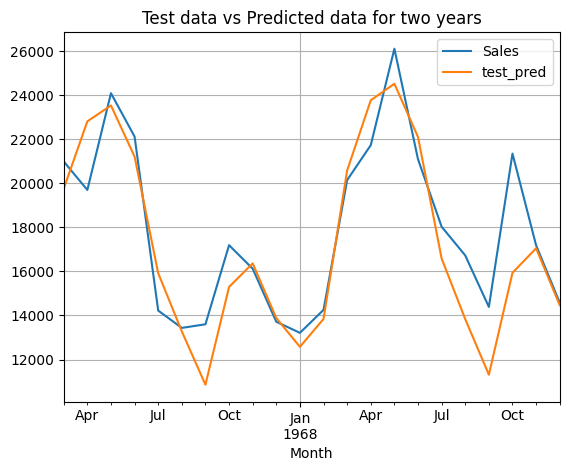

In [30]:
#visualizing the test_pred and test_data
test_data.plot(label='test_data')
test_pred.plot(label='test_pred')
plt.legend()
plt.title('Test data vs Predicted data for two years')
plt.grid()

In [15]:
#Implementing the warnings.filterwarnings('ignore') to avoid too many warning and fitting the whole dataset
warnings.filterwarnings('ignore')
hwmodel = ExponentialSmoothing(data, trend = 'add', seasonal = 'multiplicative', seasonal_periods = 12).fit()

In [16]:
#predicting 5 years into the future
prediction = hwmodel.forecast(60)

In [17]:
#displaying the predictions
round(prediction, 0)

1969-01-01    14239.0
1969-02-01    14840.0
1969-03-01    22806.0
1969-04-01    24676.0
1969-05-01    27911.0
1969-06-01    24271.0
1969-07-01    18493.0
1969-08-01    16546.0
1969-09-01    14333.0
1969-10-01    19491.0
1969-11-01    17995.0
1969-12-01    15924.0
1970-01-01    14560.0
1970-02-01    15175.0
1970-03-01    23319.0
1970-04-01    25230.0
1970-05-01    28537.0
1970-06-01    24814.0
1970-07-01    18906.0
1970-08-01    16915.0
1970-09-01    14652.0
1970-10-01    19924.0
1970-11-01    18394.0
1970-12-01    16276.0
1971-01-01    14882.0
1971-02-01    15509.0
1971-03-01    23833.0
1971-04-01    25784.0
1971-05-01    29163.0
1971-06-01    25357.0
1971-07-01    19319.0
1971-08-01    17284.0
1971-09-01    14971.0
1971-10-01    20357.0
1971-11-01    18793.0
1971-12-01    16629.0
1972-01-01    15203.0
1972-02-01    15844.0
1972-03-01    24346.0
1972-04-01    26338.0
1972-05-01    29789.0
1972-06-01    25900.0
1972-07-01    19732.0
1972-08-01    17653.0
1972-09-01    15290.0
1972-10-01

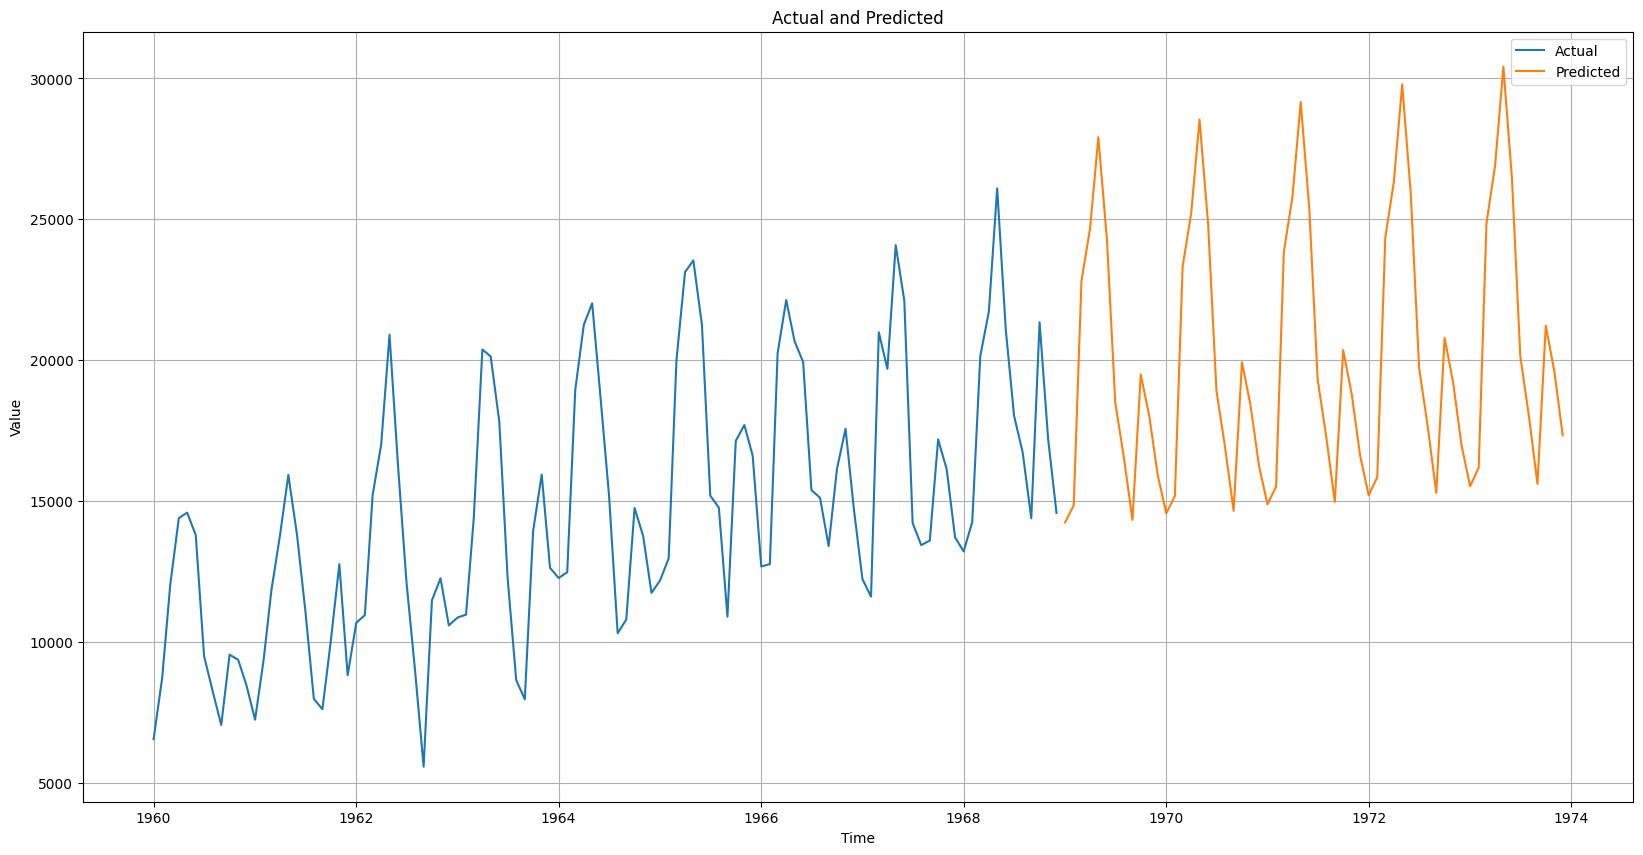

In [18]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the actual values
ax.plot(data, label='Actual')

# Plot the predicted values
ax.plot(prediction, label='Predicted')

# Set the plot title and labels
plt.title('Actual and Predicted')
plt.xlabel('Time')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

In [19]:
#creating an ARIMA model 

In [20]:
#importing necessary libraries
import itertools
import statsmodels.api as sm

In [21]:
#setting ranges for the parameters of the model
p_values = range(0, 8)
d_values = range(0, 2)
q_values = range(0, 8)

In [22]:
parameters = list(itertools.product(p_values, d_values, q_values))

In [23]:
#This is a for loop that finds the best parameters for the ARIMA model
best_aic = float("inf")  # initialize with a high value
best_model = None
best_param = None  # initialize the best_param variable

for param in parameters:
    try:
        model = sm.tsa.ARIMA(train_data, order=param)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_model = results
            best_param = param  # assign the best_param value here
    except:
        continue


In [24]:
print("Best Parameters:", best_param)
print("Best AIC:", best_aic)

Best Parameters: (6, 1, 5)
Best AIC: 1534.7544171626266


In [25]:
#using the parameters to fit the data
best_model = sm.tsa.ARIMA(train_data, order=best_param)
results = best_model.fit()

In [26]:
#predictiong
test_predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

In [27]:
test_predictions, test_data

(1967-03-01    16584.737796
 1967-04-01    20458.622873
 1967-05-01    21977.251348
 1967-06-01    18868.496160
 1967-07-01    15057.320985
 1967-08-01    13044.715251
 1967-09-01    14499.426503
 1967-10-01    16501.846004
 1967-11-01    16715.128379
 1967-12-01    14173.674280
 1968-01-01    11814.705395
 1968-02-01    12193.669976
 1968-03-01    15990.657738
 1968-04-01    20105.655612
 1968-05-01    21438.269804
 1968-06-01    18929.305943
 1968-07-01    15208.689929
 1968-08-01    13329.116518
 1968-09-01    14463.945204
 1968-10-01    16468.257518
 1968-11-01    16724.430253
 1968-12-01    14509.754730
 Freq: MS, Name: predicted_mean, dtype: float64,
             Sales
 Month            
 1967-03-01  20985
 1967-04-01  19692
 1967-05-01  24081
 1967-06-01  22114
 1967-07-01  14220
 1967-08-01  13434
 1967-09-01  13598
 1967-10-01  17187
 1967-11-01  16119
 1967-12-01  13713
 1968-01-01  13210
 1968-02-01  14251
 1968-03-01  20139
 1968-04-01  21725
 1968-05-01  26099
 1968-06-01 

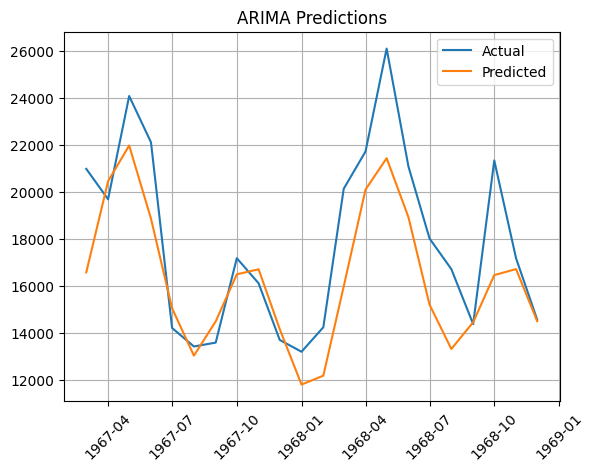

In [31]:
#plotting both the test data and the predicted values to see how our model is doing
plt.plot(test_data, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.title('ARIMA Predictions')
plt.grid()

In [32]:
#the model looks good, following the trend of the data

In [33]:
#make predictions for the whole dataset

In [34]:
#Now lets predict for the whole dataset
best_model = sm.tsa.ARIMA(data, order=best_param)
results = best_model.fit()

In [35]:
predictions = results.predict(start=len(data), end=len(data)+60)

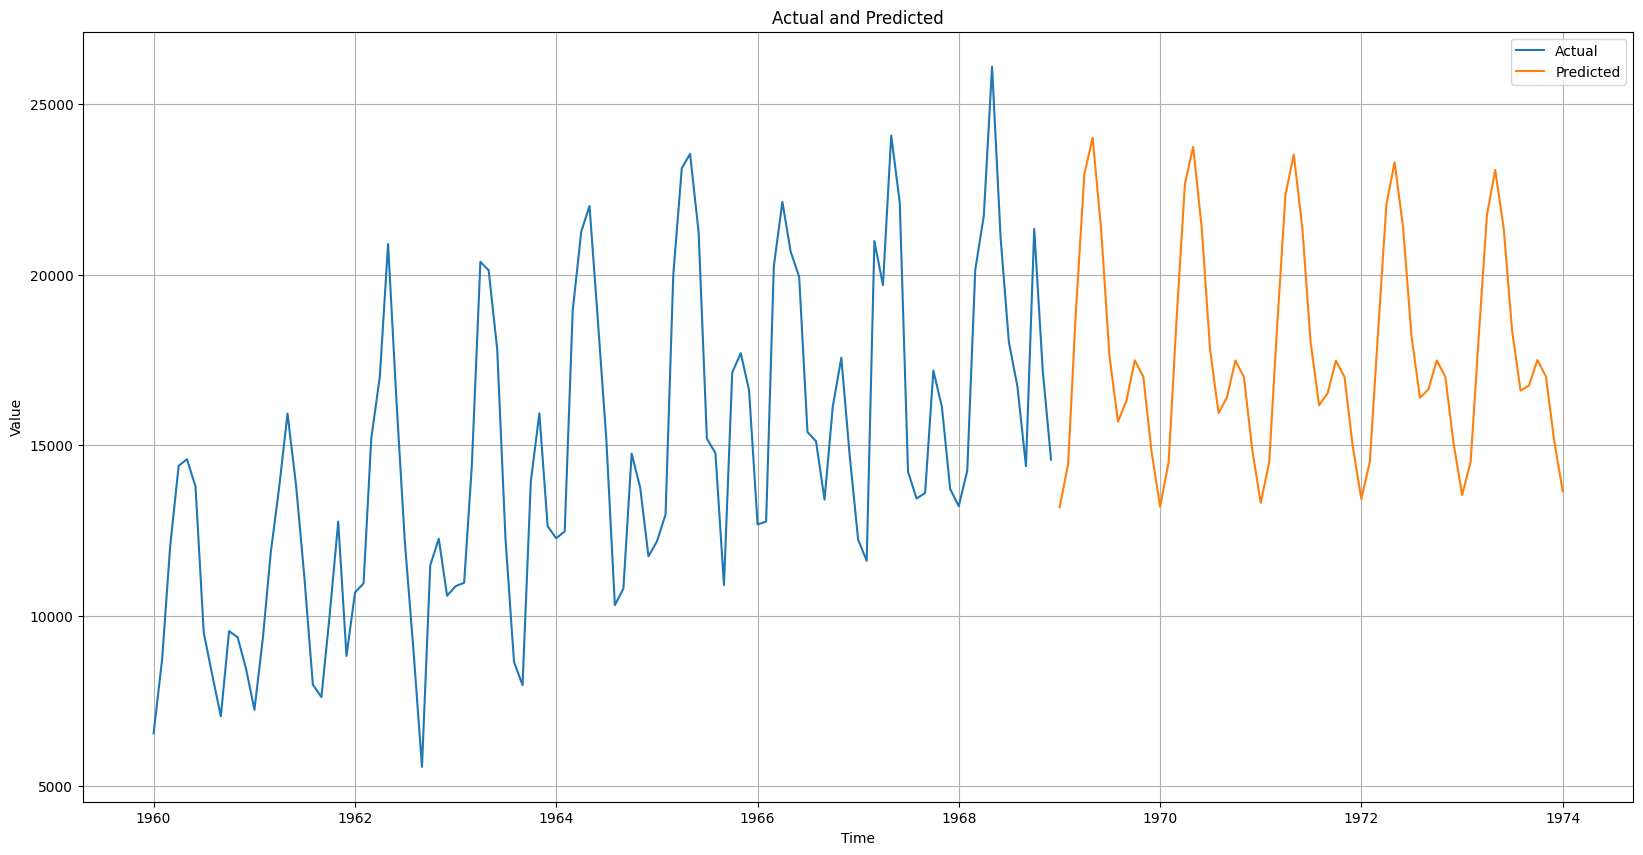

In [36]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the actual values
ax.plot(data, label='Actual')

# Plot the predicted values
ax.plot(predictions, label='Predicted')

# Set the plot title and labels
plt.title('Actual and Predicted')
plt.xlabel('Time')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()